In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Load the data-
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# (Optional) Standardize column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
)


In [3]:
import pandas as pd

# (re)build your crosstab
ct = pd.crosstab(df['category'], df['isbestseller'])

# See what the columns actually are:
print("Columns in crosstab:", ct.columns.tolist())


Columns in crosstab: [False, True]


In [5]:
# 1. Rebuild the crosstab (if needed)
ct = pd.crosstab(df['category'], df['isbestseller'])

# 2. Compute the proportion of best-sellers (True)
prop = ct.div(ct.sum(axis=1), axis=0)[True]

# 3. Sort descending to see which categories have the highest bestseller rate
prop_sorted = prop.sort_values(ascending=False)

# 4. Display the top 10
print(prop_sorted.head(10))


category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Billiard, Snooker & Pool          0.032129
Pet Supplies                      0.030200
Home Brewing & Wine Making        0.028455
Wind Instruments                  0.028000
Mirrors                           0.028000
Name: True, dtype: float64


In [9]:
import pandas as pd

# Load your data
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Option 1: Print the Index object of column names
print(df.columns)

# Option 2: Get them as a regular Python list
print(df.columns.tolist())

# Option 3: Iterate and print each name on its own line
for col in df.columns:
    print(col)


Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')
['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller', 'boughtInLastMonth', 'category']
uid
asin
title
stars
reviews
price
isBestSeller
boughtInLastMonth
category



Top 10 Categories by Best-Seller Proportion:
category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Billiard, Snooker & Pool          0.032129
Pet Supplies                      0.030200
Home Brewing & Wine Making        0.028455
Wind Instruments                  0.028000
Mirrors                           0.028000

Chi² = 36540.20, p = 0, Cramér’s V = 0.122


<Figure size 800x600 with 0 Axes>

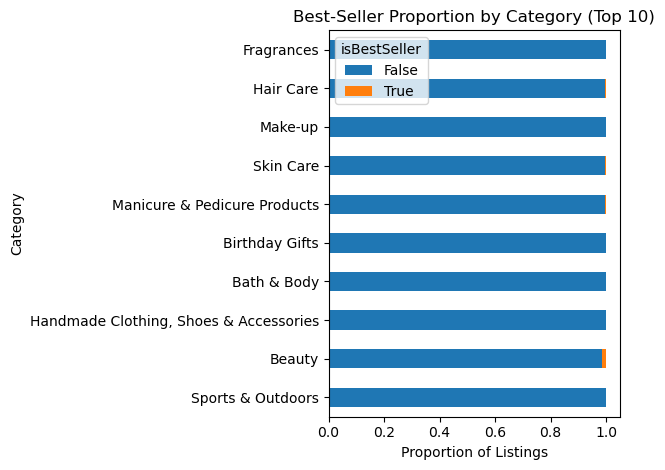

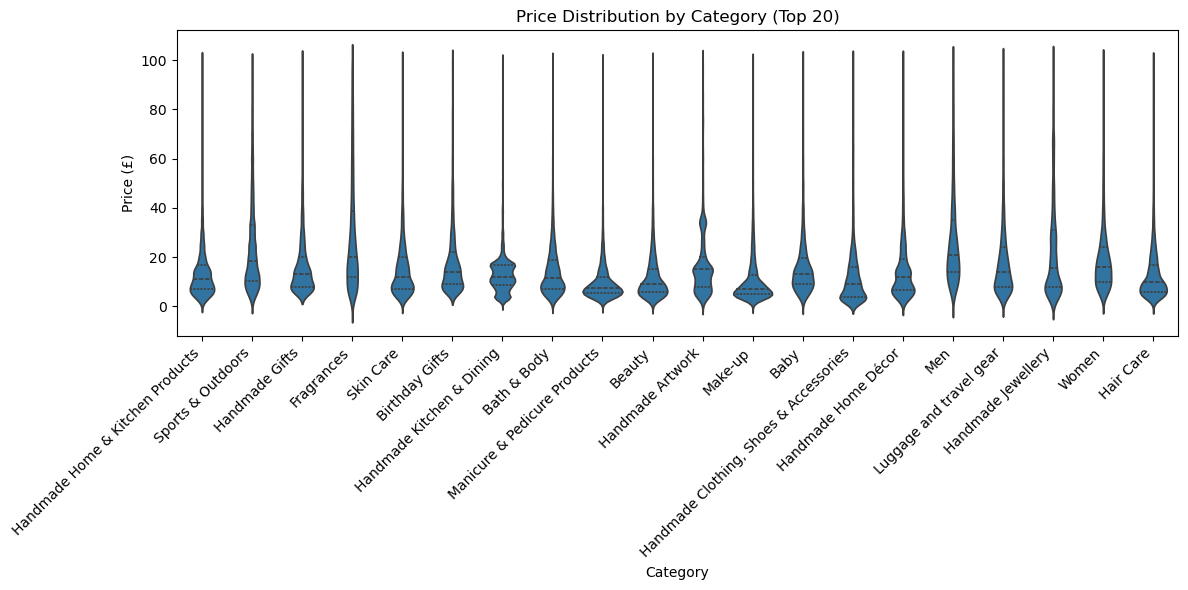


Top 5 Categories by Median Price:
category
Desktop PCs       74.00
Boxing Shoes      69.79
Tablets           69.00
Graphics Cards    68.54
Motherboards      67.92


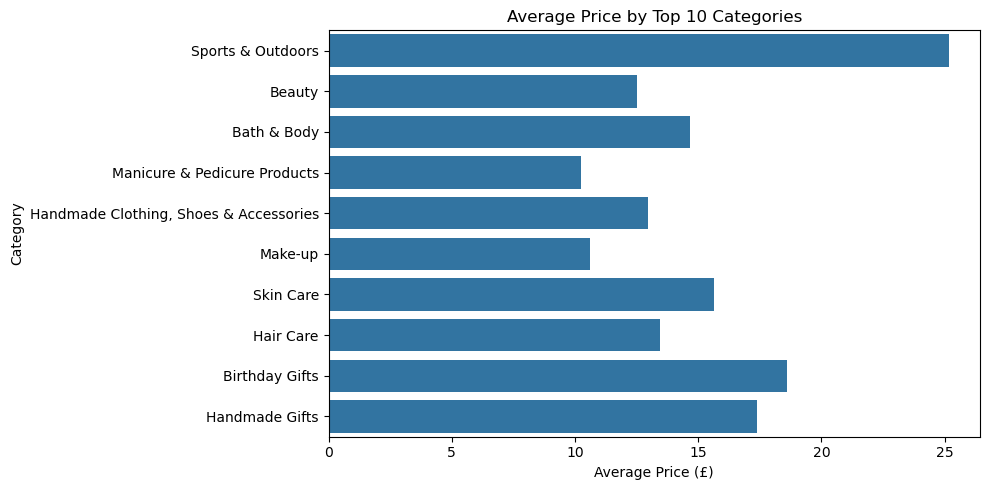


Top 5 Categories by Average Price:
category
Motherboards      68.772432
Boxing Shoes      67.417803
Desktop PCs       66.915562
Tablets           66.552971
Graphics Cards    65.103509


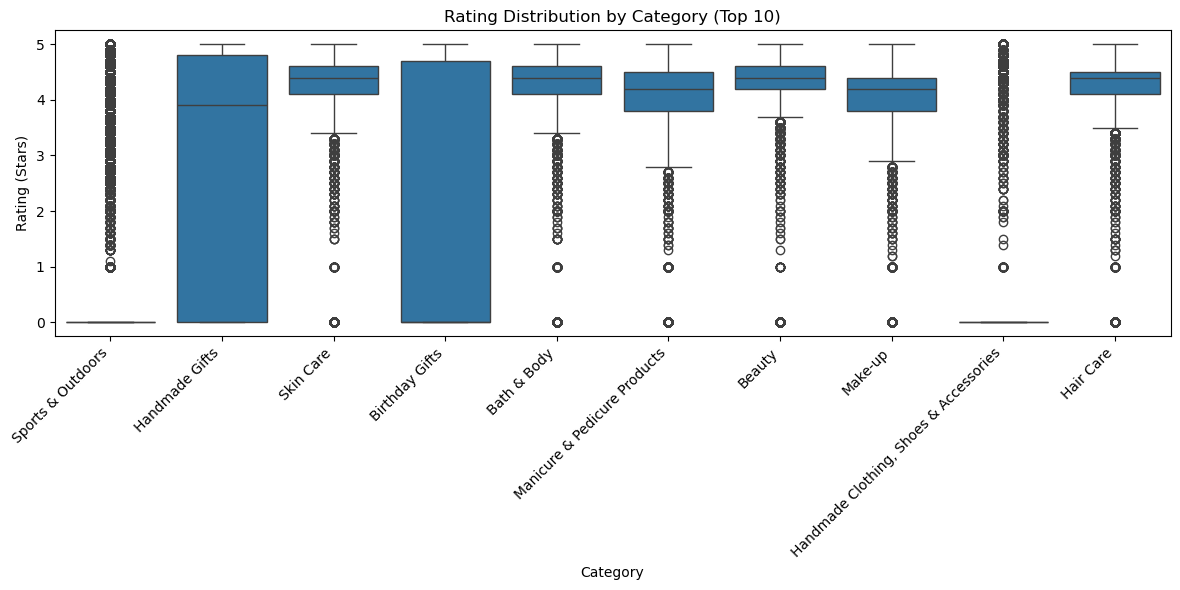


Top 5 Categories by Median Rating:
category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6

Pearson correlation (Price vs. Stars): -0.078


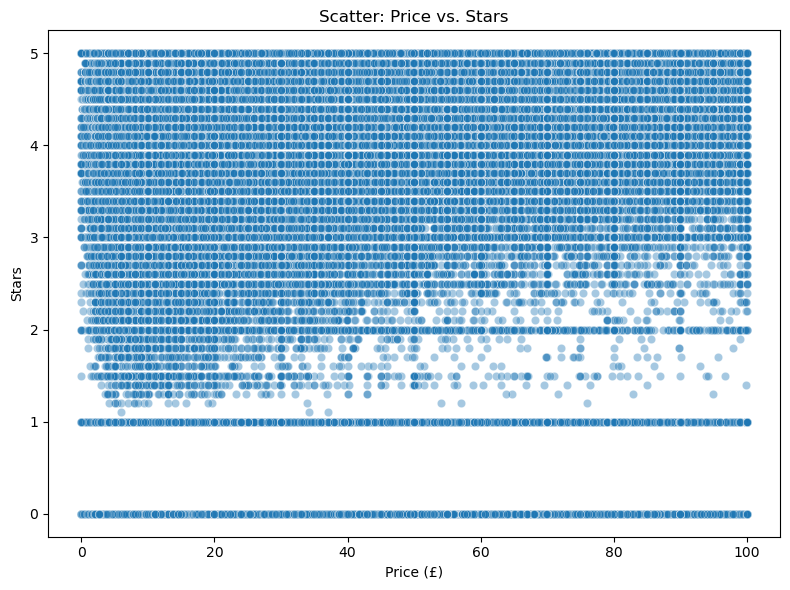

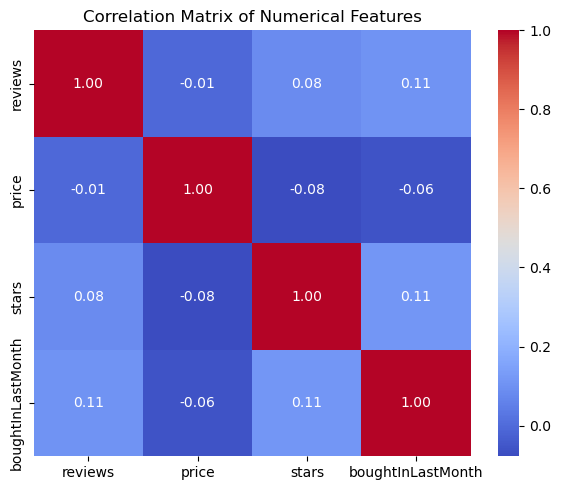

<Figure size 600x600 with 0 Axes>

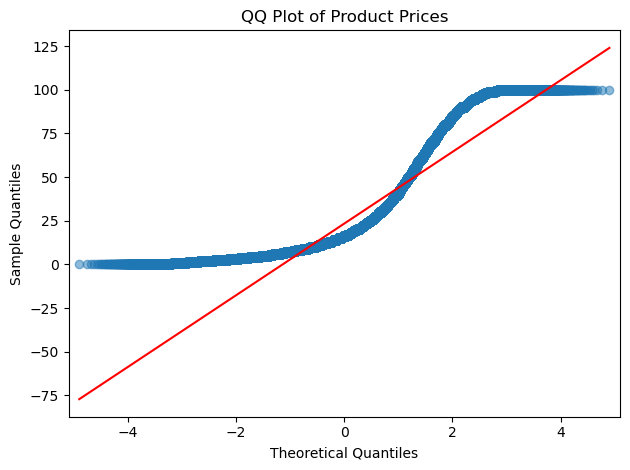

In [10]:
# ── Setup & Imports ─────────────────────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# ── Load Data ────────────────────────────────────────────────────────────────────
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')  # update path as needed

# ── Part 1: Best-Seller Trends by Category ──────────────────────────────────────

# 1.1 Crosstab & Proportion of Best-Sellers
ct = pd.crosstab(df['category'], df['isBestSeller'])
# “Best-seller” is the True column
prop = ct.div(ct.sum(axis=1), axis=0)[True]
prop_sorted = prop.sort_values(ascending=False)
print("\nTop 10 Categories by Best-Seller Proportion:")
print(prop_sorted.head(10).to_string())

# 1.2 Chi-Square Test & Cramér’s V
chi2, p, _, _ = stats.chi2_contingency(ct)
n = ct.values.sum()
phi2 = chi2 / n
r, k = ct.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))
print(f"\nChi² = {chi2:.2f}, p = {p:.3g}, Cramér’s V = {cramers_v:.3f}")

# 1.3 Stacked Bar Chart (Top 10 Categories by Count)
ct_pct = ct.div(ct.sum(axis=1), axis=0)
top10_cats = df['category'].value_counts().nlargest(10).index
plt.figure(figsize=(8,6))
ct_pct.loc[top10_cats].plot.barh(stacked=True)
plt.legend(title='isBestSeller', labels=['False','True'])
plt.xlabel('Proportion of Listings')
plt.ylabel('Category')
plt.title('Best-Seller Proportion by Category (Top 10)')
plt.tight_layout()
plt.show()


# ── Part 2: Prices & Ratings Across Categories ─────────────────────────────────

# 2.1 Remove Price Outliers (IQR Method)
prices = df['price'].dropna()
Q1, Q3 = prices.quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
df_clean = df[(df['price'] >= lower) & (df['price'] <= upper)].copy()

# 2.2 Violin Plot of Price by Top 20 Categories
top20 = df_clean['category'].value_counts().nlargest(20).index
plt.figure(figsize=(12,6))
sns.violinplot(
    data=df_clean[df_clean['category'].isin(top20)],
    x='category', y='price', inner='quartile'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Price (£)')
plt.title('Price Distribution by Category (Top 20)')
plt.tight_layout()
plt.show()

# Median price across all categories
medians = df_clean.groupby('category')['price'].median().sort_values(ascending=False)
print("\nTop 5 Categories by Median Price:")
print(medians.head(5).to_string())

# 2.3 Average Price Bar Chart (Top 10 Categories by Count)
avg_price = df_clean.groupby('category')['price'].mean()
top10 = df_clean['category'].value_counts().nlargest(10).index
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price.loc[top10].values, y=top10)
plt.xlabel('Average Price (£)')
plt.ylabel('Category')
plt.title('Average Price by Top 10 Categories')
plt.tight_layout()
plt.show()
print("\nTop 5 Categories by Average Price:")
print(avg_price.sort_values(ascending=False).head(5).to_string())

# 2.4 Box Plot of Ratings by Top 10 Categories
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_clean[df_clean['category'].isin(top10)],
    x='category', y='stars'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Rating (Stars)')
plt.title('Rating Distribution by Category (Top 10)')
plt.tight_layout()
plt.show()
print("\nTop 5 Categories by Median Rating:")
print(df_clean.groupby('category')['stars'].median().sort_values(ascending=False).head(5).to_string())


# ── Part 3: Price vs. Rating Interplay ────────────────────────────────────────

# 3.1 Pearson Correlation
pr = df_clean[['price','stars']].dropna()
corr = pr['price'].corr(pr['stars'])
print(f"\nPearson correlation (Price vs. Stars): {corr:.3f}")

# 3.2 Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pr, x='price', y='stars', alpha=0.4)
plt.xlabel('Price (£)')
plt.ylabel('Stars')
plt.title('Scatter: Price vs. Stars')
plt.tight_layout()
plt.show()

# 3.3 Correlation Heatmap
num_cols = df_clean[['reviews','price','stars','boughtInLastMonth']]
corr_matrix = num_cols.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# 3.4 QQ-Plot for Price Normality
plt.figure(figsize=(6,6))
sm.qqplot(df_clean['price'], line='s', alpha=0.5)
plt.title('QQ Plot of Product Prices')
plt.tight_layout()
plt.show()
